# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [10]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [11]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [12]:
## load dataset here
df = pd.read_csv("icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [13]:
## parsing data here
images, labels = parse_data(df)


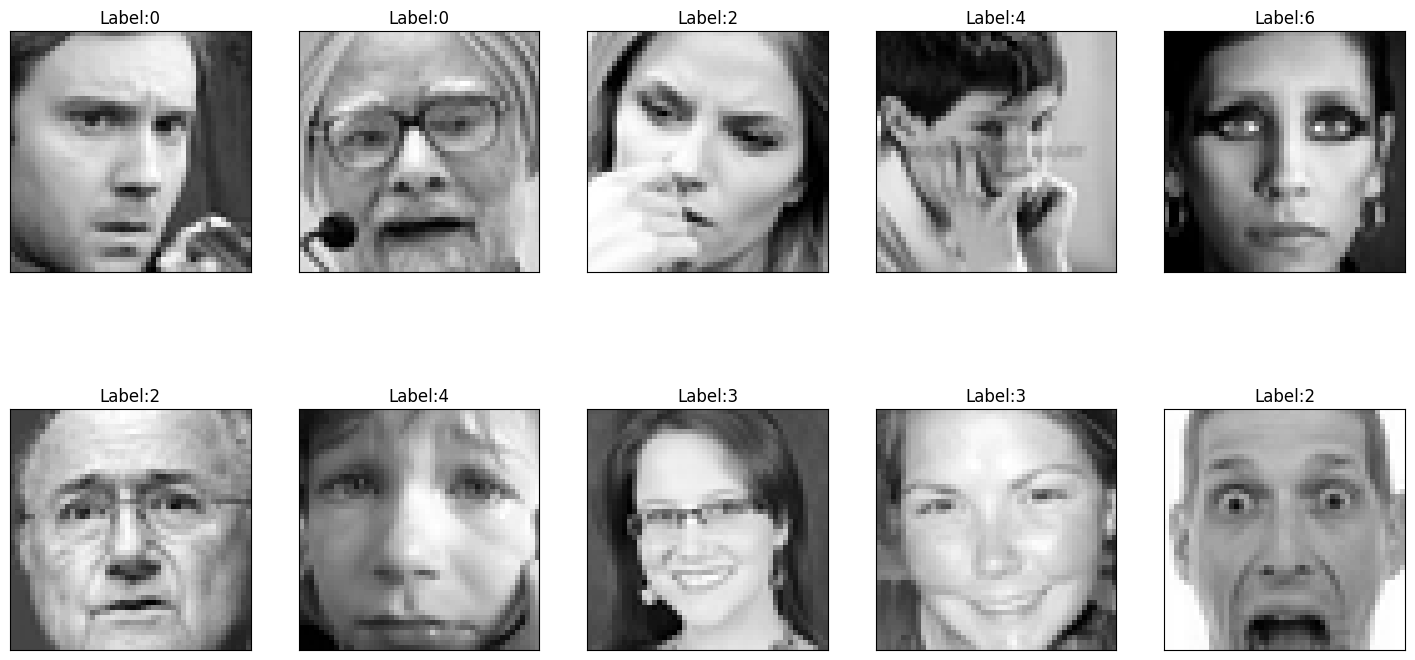

In [14]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

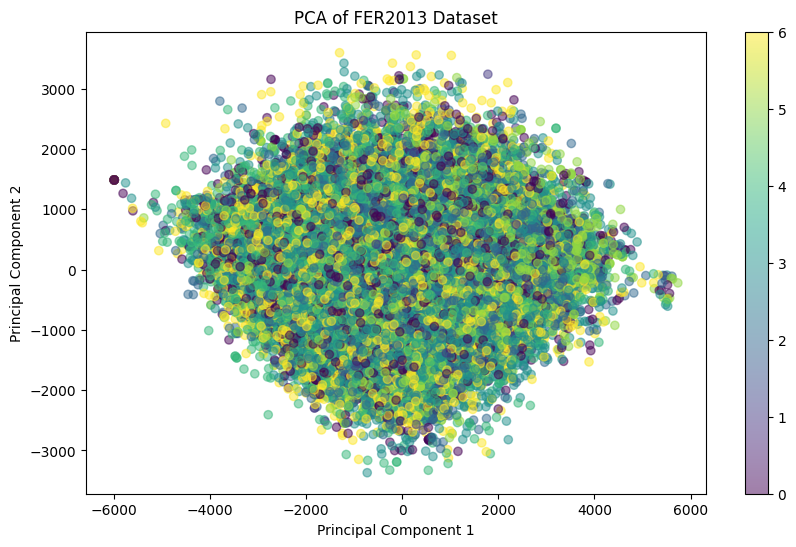

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming `images` is already parsed and reshaped into the appropriate format

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Reshape images for PCA if necessary
num_images, height, width = images.shape
images_flat = images.reshape(num_images, height * width)

# Fit PCA on the flattened images
pca.fit(images_flat)

# Transform the data onto the first two principal components
images_pca = pca.transform(images_flat)

# Visualize the projected data
plt.figure(figsize=(10, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('PCA of FER2013 Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


In [ ]:
# explained_variance_ratio of 2 components
pca.explained_variance_ratio_

array([0.2892651, 0.0980239])

- The explanation percentage of the 2 main components brings very little information (0.2892651, 0.0980239). Therefore, the data representation will not be effective in clearly seeing the classes, which leads to the data of the classes overlapping each other. From there, the relationship between classes cannot be observed

=> So we cant visualize data with only 2 components

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

Number of 92% components to retain, at elbow point: 143


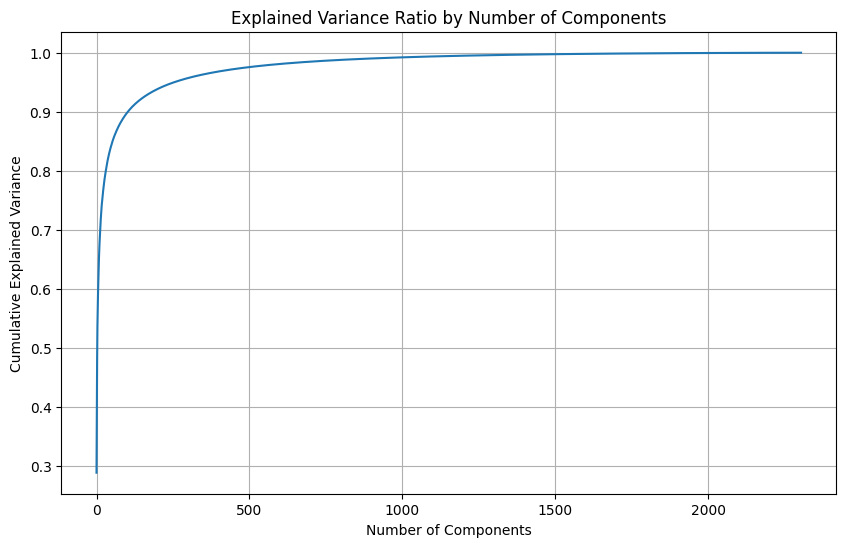

In [16]:
# Perform PCA to find the optimal number of components
pca_full = PCA()
pca_full.fit(images_flat)

# Getting explained variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 92% of the variance
n_components = np.argmax(cumulative_variance >= 0.92) + 1
print(f"Number of 92% components to retain, at elbow point: {n_components}")

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()


- Identify the Desired Variance Threshold: In this case, we are aiming to capture 92% of the total variance.
- Locate the Elbow Point: The elbow point in the plot is where the explained variance starts to level off. According to the information given, this occurs at 143 components.
- Given the plot and analysis, the optimal number of principal components to retain 92% of the variance is 143. This means that using the first 143 principal components will capture 92% of the total variance in the dataset, balancing dimensionality reduction with the retention of essential information.

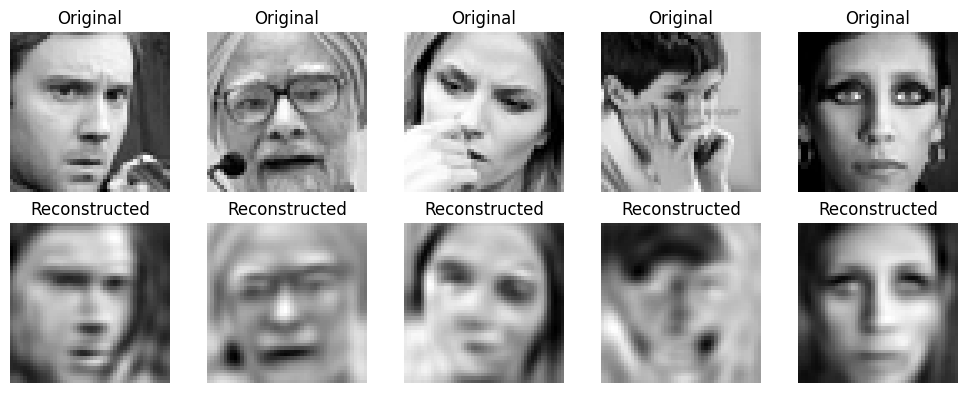

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Assuming `images` is already parsed and reshaped into the appropriate format

# Flatten images for PCA if necessary
num_images, height, width = images.shape
images_flat = images.reshape(num_images, height * width)

# Initialize PCA with desired number of components 
pca = PCA(n_components=n_components, random_state=42)

# Fit PCA on the flattened images
pca.fit(images_flat)

# Transform the data onto the first `n_components` principal components
images_pca = pca.transform(images_flat)

# Inverse transform to reconstruct the original images
images_reconstructed = pca.inverse_transform(images_pca)

# Reshape reconstructed images back to original shape
images_reconstructed = images_reconstructed.reshape(num_images, height, width)

# Plot original vs reconstructed images for comparison
n = 5  # Number of images to display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original image
    plt.subplot(2, n, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Reconstructed image
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(images_reconstructed[i], cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Import library

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import torch
import torch.nn as nn

In [ ]:
# Save the PCA-transformed data to a csv file, so we can use it easily without loading the original dataset
df_pca = pd.DataFrame(images_pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca['emotion'] = labels
df_pca.to_csv('../data/fer2013_pca.csv', index=False)

In [17]:
# Load the PCA-transformed data from the csv file
images_pca = pd.read_csv('fer2013_pca.csv')
labels = images_pca['emotion']
images_pca = images_pca.drop(columns=['emotion'])

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [19]:
from sklearn.model_selection import train_test_split

# Split train and test set (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(images_pca, labels, test_size=0.2, random_state=42)

print("Shape of training set (X_train_pca, y_train):", X_train.shape, y_train.shape)
print("Shape of test set (X_test_pca, y_test):", X_test.shape, y_test.shape)

Shape of training set (X_train_pca, y_train): (28709, 143) (28709,)
Shape of test set (X_test_pca, y_test): (7178, 143) (7178,)


### 3.1 For transformed data

#### 3.1.1 Decision Tree classification

In [22]:
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Standardization step
    ('dt', DecisionTreeClassifier(random_state=42))  # DecisionTreeClassifier
])

# Define the parameter grid for DecisionTree
param_grid_dt = {
    'dt__max_depth': [None, 10],
    'dt__min_samples_split': [2, 5],
    'dt__min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with the pipeline
dt_pipeline = GridSearchCV(estimator=pipeline_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=1)

# Fit the model
dt_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [None, 10],
                         'dt__min_samples_leaf': [1, 2],
                         'dt__min_samples_split': [2, 5]},
             verbose=2)

#### 3.1.2 Random Forest classification

In [23]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),                    # Standardize features
    ('rf', RandomForestClassifier(random_state=42))  # RandomForest classifier
])

# Define the parameter grid for RandomForest
param_grid_rf = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Perform GridSearchCV for the pipeline
rf_pipeline = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)
rf_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [50, 100, 150]},
             verbose=1)

#### 3.1.3 Naive Bayes classification

In [ ]:
# Fine-tune and train model
nb_param_grid = {
    'nb__var_smoothing': np.logspace(-4, 3, num=50)
}
NB_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardization step
    ('nb', GaussianNB())  # Naive Bayes classifier step
])
nb_pipeline = GridSearchCV(NB_model, nb_param_grid, cv=5, scoring="f1_weighted", n_jobs=-1, verbose=1)
nb_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('nb', GaussianNB())]),
             param_grid={'nb__var_smoothing': array([1.00000000e-04, 1.35304777e-04, 1.83073828e-04, 2.47707636e-04,
       3.35160265e-04, 4.53487851e-04, 6.13590727e-04, 8.30217568e-04,
       1.12332403e-03, 1.51991108e-03, 2.05651231e-03, 2.78255940e-03,
       3.76493581e-03, 5.09413801e-03, 6.89261...
       9.54548457e+05, 1.29154967e+06, 1.74752840e+06, 2.36448941e+06,
       3.19926714e+06, 4.32876128e+06, 5.85702082e+06, 7.92482898e+06,
       1.07226722e+07, 1.45082878e+07, 1.96304065e+07, 2.65608778e+07,
       3.59381366e+07, 4.86260158e+07, 6.57933225e+07, 8.90215085e+07,
       1.20450354e+08, 1.62975083e+08, 2.20513074e+08, 2.98364724e+08,
       4.03701726e+08, 5.46227722e+08, 7.39072203e+08, 1.00000000e+09])},
             scoring='f1_weighted', verbose=1)

#### 3.1.4 MLP classification

In [ ]:
# Fine-tune and train model
mlp_param_grid = {
    'mlp__hidden_layer_sizes': [[512, 256, 256, 128, 128, 64], [512, 256, 256, 128, 128, 128, 64]],
    'mlp__activation': ['relu'],
    'mlp__learning_rate': ['adaptive'],
    'mlp__learning_rate_init': [0.0005, 0.001],
    'mlp__verbose': [True],
    'mlp__early_stopping': [True]
}
mlp_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardization step
    ('mlp', MLPClassifier()) # MLP classifier step
])
mlp_pipeline = GridSearchCV(mlp_model, mlp_param_grid, cv=5, n_jobs=-1, verbose=1)
mlp_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Iteration 1, loss = 1.72359280
Validation score: 0.351328
Iteration 2, loss = 1.54007180
Validation score: 0.374837
Iteration 3, loss = 1.39315726
Validation score: 0.393557
Iteration 4, loss = 1.21767492
Validation score: 0.370483
Iteration 5, loss = 1.01432379
Validation score: 0.400087
Iteration 6, loss = 0.80551440
Validation score: 0.392251
Iteration 7, loss = 0.60104827
Validation score: 0.388768
Iteration 8, loss = 0.43860735
Validation score: 0.388333
Iteration 9, loss = 0.31013520
Validation score: 0.382673
Iteration 10, loss = 0.21400482
Validation score: 0.395734
Iteration 11, loss = 0.16708694
Validation score: 0.382673
Iteration 12, loss = 0.15015009
Validation score: 0.385285
Iteration 13, loss = 0.12272374
Validation score: 0.391380
Iteration 14, loss = 0.11060410
Validation score: 0.384850
Iteration 15, loss = 0.08258503
Validation score: 0.382673
Iteration 16, loss = 0.08623869
Validation score: 0.377013
Valid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp', MLPClassifier())]),
             param_grid={'mlp__activation': ['relu'],
                         'mlp__early_stopping': [True],
                         'mlp__hidden_layer_sizes': [[512, 256, 256, 128, 128,
                                                      64],
                                                     [512, 256, 256, 128, 128,
                                                      128, 64]],
                         'mlp__learning_rate': ['adaptive'],
                         'mlp__learning_rate_init': [0.0005, 0.001],
                         'mlp__verbose': [True]},
             verbose=1)

### 3.2 For original data

- CNN for feature engineering

In [ ]:
class CNNSimple(nn.Module):
  def __init__(self,
               input_shape: int,
               num_classes: int,
               in_channels: int,
               out_channels: int,
               kernel_size: int = 3,
               stride: int = 1,
               padding: int = 1,
               dropout_prob: float = 0.2):
    super(CNNSimple, self).__init__()

    # Initialize the first convolutional layer
    self.conv1 = nn.Conv2d(in_channels = in_channels,
                           out_channels = out_channels ,
                           kernel_size = kernel_size,
                           stride = stride,
                           padding = padding)

    # Initialize the max pooling layer
    self.pool = nn.MaxPool2d(kernel_size = kernel_size - 1, stride = stride)

    # Initialize the second convolutional layer
    self.conv2 = nn.Conv2d(in_channels = out_channels,
                           out_channels = out_channels * 2,
                           kernel_size = kernel_size,
                           stride = stride,
                           padding = padding)
    # Relu activation function
    self.relu = nn.ReLU()

    # the first Fully connected layer
    self.fc1 = nn.Linear(out_channels * 2, out_channels * 4)

    # Dropout layer to prevent overfitting
    self.dropout = nn.Dropout(dropout_prob)

    # the second fully connected layer (output)
    self.fc2 = nn.Linear(out_channels * 4, num_classes)

  def forward(self, x):
    # Forward pass :  extract features
    x = self.extract_features(x)
    return x

  def extract_features(self, x):
    # Extract features from input using convolutional and pooling layers
    x = self.conv1(x)
    x = self.relu(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool(x)
    # Flatten the feature maps
    x = x.view(x.size(0), -1)

    return x

In [ ]:
# convert into tensor type and add channel dim
X = np.expand_dims(images.astype(np.float32), axis=1) # add channel dim
X_tensor = torch.from_numpy(X) # convert numpy type into tensor  type

## Initialize CNNSimple Model
cnn = CNNSimple(input_shape = (48, 48),
                num_classes = 7,
                in_channels = 1,
                out_channels = 16,
                kernel_size = 3,
                stride = 3,
                padding = 1,
                dropout_prob = 0.2)


with torch.no_grad():  # don't calculate gradient
    data_cnn = cnn(X_tensor) # forward pass

print(data_cnn.shape)  # print output shape after extracting features

torch.Size([35887, 32])


- Split data

In [ ]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu ban đầu thành train và test (80%-20%)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(data_cnn, labels, test_size=0.2, random_state=42)

print("Shape of training set (X_train_cnn, y_train_cnn):", X_train_cnn.shape, y_train_cnn.shape)
print("Shape of test set (X_test_cnn, y_test_cnn):", X_test_cnn.shape, y_test_cnn.shape)

Shape of training set (X_train_cnn, y_train_cnn): torch.Size([28709, 32]) (28709,)
Shape of test set (X_test_cnn, y_test_cnn): torch.Size([7178, 32]) (7178,)


#### 3.2.1 Decision tree

In [ ]:
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Standardization step
    ('dt', DecisionTreeClassifier(random_state=42))  # DecisionTreeClassifier
])

# Define the parameter grid for DecisionTree
param_grid_dt = {
    'dt__max_depth': [None, 10],
    'dt__min_samples_split': [2, 5],
    'dt__min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with the pipeline
dt_pipeline = GridSearchCV(estimator=pipeline_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)

# Fit the model
dt_pipeline.fit(X_train_cnn, y_train_cnn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [None, 10],
                         'dt__min_samples_leaf': [1, 2],
                         'dt__min_samples_split': [2, 5]},
             verbose=2)

#### 3.2.2 Random forest

In [ ]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),                    # Standardize features
    ('rf', RandomForestClassifier(random_state=42))  # RandomForest classifier
])

# Define the parameter grid for RandomForest
param_grid_rf = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Perform GridSearchCV for the pipeline
rf_pipeline = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)
rf_pipeline.fit(X_train_cnn, y_train_cnn)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [50, 100, 150]},
             verbose=1)

#### 3.2.3 Naive Bayes

In [ ]:
# Fine-tune and train model
nb_param_grid = {
    'nb__var_smoothing': np.logspace(-4, 3, num=50)
}
NB_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardization step
    ('nb', GaussianNB())  # Naive Bayes classifier step
])
nb_pipeline = GridSearchCV(NB_model, nb_param_grid, cv=5, scoring="f1_weighted", n_jobs=-1, verbose=1)
nb_pipeline.fit(X_train_cnn, y_train_cnn)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('nb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'nb__var_smoothing': array([1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-...
       1.00000000e+00, 1.38949549e+00, 1.93069773e+00, 2.68269580e+00,
       3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
       1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
       5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
       1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
       7.19685673e+02, 1.00000000e+03])},
             scoring='f1_weighted', verbose=1)

#### 3.2.4 MLP

In [ ]:
# Fine-tune and train model
mlp_param_grid = {
    'mlp__hidden_layer_sizes': [[512, 256, 256, 128, 128, 64], [512, 256, 256, 128, 128, 128, 64]],
    'mlp__activation': ['relu'],
    'mlp__learning_rate': ['adaptive'],
    'mlp__learning_rate_init': [0.0005, 0.001],
    'mlp__verbose': [True],
    'mlp__early_stopping': [True]
}
mlp_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardization step
    ('mlp', MLPClassifier()) # MLP classifier step
])
mlp_pipeline = GridSearchCV(mlp_model, mlp_param_grid, cv=5, n_jobs=-1, verbose=1)
mlp_pipeline.fit(X_train_cnn, y_train_cnn)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Iteration 1, loss = 1.79097450
Validation score: 0.264716
Iteration 2, loss = 1.75335489
Validation score: 0.285963
Iteration 3, loss = 1.73803920
Validation score: 0.290491
Iteration 4, loss = 1.72238288
Validation score: 0.293626
Iteration 5, loss = 1.70376184
Validation score: 0.284222
Iteration 6, loss = 1.68646383
Validation score: 0.284918
Iteration 7, loss = 1.66804661
Validation score: 0.297806
Iteration 8, loss = 1.64128435
Validation score: 0.283525
Iteration 9, loss = 1.61193729
Validation score: 0.289098
Iteration 10, loss = 1.57561000
Validation score: 0.284222
Iteration 11, loss = 1.53767973
Validation score: 0.276559
Iteration 12, loss = 1.49292851
Validation score: 0.282480
Iteration 13, loss = 1.43970863
Validation score: 0.276907
Iteration 14, loss = 1.38353920
Validation score: 0.292929
Iteration 15, loss = 1.32552056
Validation score: 0.291188
Iteration 16, loss = 1.27555214
Validation score: 0.267154
Itera

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp', MLPClassifier())]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu'],
                         'mlp__early_stopping': [True],
                         'mlp__hidden_layer_sizes': [[512, 256, 256, 128, 128,
                                                      64],
                                                     [512, 256, 256, 128, 128,
                                                      128, 64]],
                         'mlp__learning_rate': ['adaptive'],
                         'mlp__learning_rate_init': [0.0005, 0.001],
                         'mlp__verbose': [True]},
             verbose=1)

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.

Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



### 4.1 For transformed data

#### 4.1.1 Decision tree

In [ ]:
# Print best parameters
print("Best parameters:", dt_pipeline.best_params_)
# Predict on the test set
pred = dt_pipeline.predict(X_test)
# Print classification report
print(classification_report(y_test, pred))

Best parameters for DecisionTree: {'dt__max_depth': 10, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.21      0.12      0.15       985
           1       0.17      0.01      0.02       102
           2       0.22      0.16      0.19      1043
           3       0.35      0.54      0.42      1765
           4       0.22      0.22      0.22      1210
           5       0.40      0.30      0.35       795
           6       0.24      0.25      0.24      1278

    accuracy                           0.29      7178
   macro avg       0.26      0.23      0.23      7178
weighted avg       0.27      0.29      0.27      7178



#### 4.1.2 Random forest

In [ ]:
# Print best parameters
print("Best parameters:", rf_pipeline.best_params_)
# Predict on the test set
pred = rf_pipeline.predict(X_test)
# Print classification report
print(classification_report(y_test, pred))

Best parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 150}
              precision    recall  f1-score   support

           0       0.60      0.16      0.25       985
           1       1.00      0.27      0.43       102
           2       0.58      0.24      0.34      1043
           3       0.35      0.84      0.50      1765
           4       0.36      0.29      0.32      1210
           5       0.76      0.48      0.59       795
           6       0.42      0.27      0.33      1278

    accuracy                           0.41      7178
   macro avg       0.58      0.36      0.39      7178
weighted avg       0.49      0.41      0.39      7178



#### 4.1.3 Naive Bayes

In [ ]:
# Print best parameters
print("Best parameters:", nb_pipeline.best_params_)
# Predict on the test set
pred = nb_pipeline.predict(X_test)
# Print classification report
print(classification_report(y_test, pred))

Best parameters for DecisionTree: {'nb__var_smoothing': 0.03125715849688238}
              precision    recall  f1-score   support

           0       0.27      0.16      0.20       985
           1       0.04      0.30      0.07       102
           2       0.24      0.26      0.25      1043
           3       0.40      0.53      0.45      1765
           4       0.29      0.16      0.20      1210
           5       0.49      0.31      0.38       795
           6       0.31      0.28      0.29      1278

    accuracy                           0.31      7178
   macro avg       0.29      0.29      0.26      7178
weighted avg       0.33      0.31      0.30      7178



#### 4.1.4 MLP

In [ ]:
# Print best parameters
print("Best parameters:", mlp_pipeline.best_params_)
# Predict on the test set
pred = mlp_pipeline.predict(X_test)
# Print classification report
print(classification_report(y_test, pred))

Best parameters for DecisionTree: {'mlp__activation': 'relu', 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': [512, 256, 256, 128, 128, 64], 'mlp__learning_rate': 'adaptive', 'mlp__learning_rate_init': 0.001, 'mlp__verbose': True}
              precision    recall  f1-score   support

           0       0.31      0.29      0.30       985
           1       0.00      0.00      0.00       102
           2       0.36      0.23      0.28      1043
           3       0.46      0.74      0.57      1765
           4       0.33      0.32      0.32      1210
           5       0.63      0.51      0.56       795
           6       0.42      0.31      0.35      1278

    accuracy                           0.42      7178
   macro avg       0.36      0.34      0.34      7178
weighted avg       0.41      0.42      0.40      7178



c:\Users\Admin\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 4.2 For original data

#### 4.2.1 Decision tree

In [ ]:
# Print best parameters
print("Best parameters:", dt_pipeline.best_params_)
# Predict on the test set
pred = dt_pipeline.predict(X_test_cnn)
# Print classification report
print(classification_report(y_test_cnn, pred))

Best parameters: {'dt__max_depth': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.23      0.23      0.23       985
           1       0.26      0.28      0.27       102
           2       0.25      0.25      0.25      1043
           3       0.31      0.31      0.31      1765
           4       0.23      0.23      0.23      1210
           5       0.33      0.35      0.34       795
           6       0.27      0.25      0.26      1278

    accuracy                           0.27      7178
   macro avg       0.27      0.27      0.27      7178
weighted avg       0.27      0.27      0.27      7178



#### 4.2.2 Random forest

In [ ]:
# Print best parameters
print("Best parameters:", rf_pipeline.best_params_)
# Predict on the test set
pred = rf_pipeline.predict(X_test_cnn)
# Print classification report
print(classification_report(y_test_cnn, pred))

Best parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 150}
              precision    recall  f1-score   support

           0       0.44      0.15      0.22       985
           1       1.00      0.24      0.38       102
           2       0.42      0.22      0.29      1043
           3       0.32      0.69      0.44      1765
           4       0.30      0.27      0.29      1210
           5       0.57      0.40      0.47       795
           6       0.37      0.23      0.28      1278

    accuracy                           0.36      7178
   macro avg       0.49      0.31      0.34      7178
weighted avg       0.39      0.36      0.34      7178



#### 4.2.3 Naive Bayes

In [ ]:
# Print best parameters
print("Best parameters:", nb_pipeline.best_params_)
# Predict on the test set
pred = nb_pipeline.predict(X_test_cnn)
# Print classification report
print(classification_report(y_test_cnn, pred))

Best parameters: {'nb__var_smoothing': 0.2682695795279725}
              precision    recall  f1-score   support

           0       0.20      0.02      0.04       985
           1       0.00      0.00      0.00       102
           2       0.13      0.03      0.05      1043
           3       0.29      0.44      0.35      1765
           4       0.25      0.13      0.17      1210
           5       0.17      0.65      0.27       795
           6       0.28      0.13      0.17      1278

    accuracy                           0.23      7178
   macro avg       0.19      0.20      0.15      7178
weighted avg       0.23      0.23      0.19      7178



#### 4.2.4 MLP

In [ ]:
# Print best parameters
print("Best parameters:", mlp_pipeline.best_params_)
# Predict on the test set
pred = mlp_pipeline.predict(X_test_cnn)
# Print classification report
print(classification_report(y_test_cnn, pred))

Best parameters: {'mlp__activation': 'relu', 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': [512, 256, 256, 128, 128, 64], 'mlp__learning_rate': 'adaptive', 'mlp__learning_rate_init': 0.0005, 'mlp__verbose': True}
              precision    recall  f1-score   support

           0       0.27      0.06      0.10       985
           1       0.00      0.00      0.00       102
           2       0.23      0.03      0.05      1043
           3       0.29      0.73      0.42      1765
           4       0.25      0.19      0.21      1210
           5       0.31      0.23      0.26       795
           6       0.30      0.21      0.25      1278

    accuracy                           0.29      7178
   macro avg       0.24      0.21      0.18      7178
weighted avg       0.27      0.29      0.23      7178



C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Text(0, 0.5, 'Accuracy')

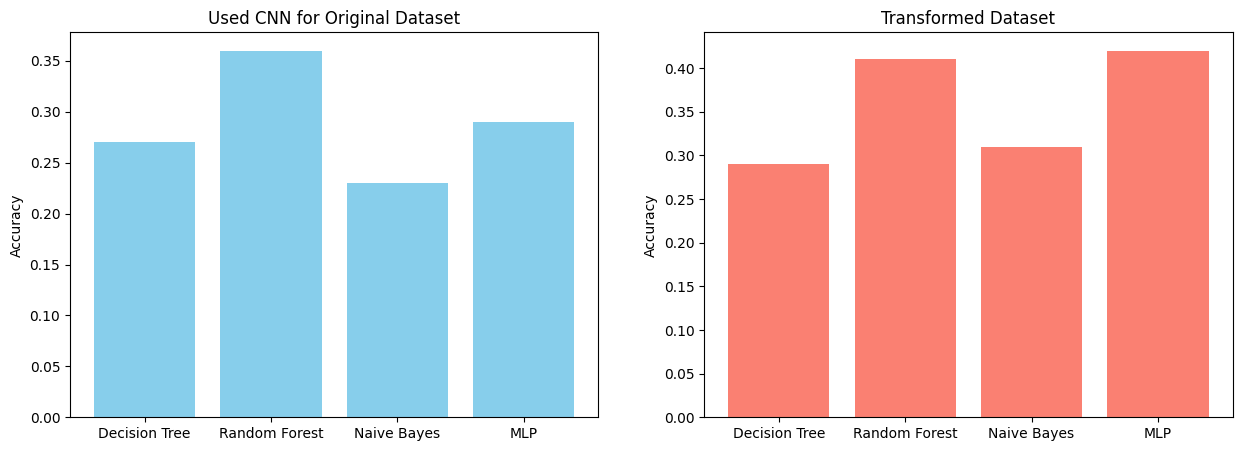

In [8]:
import matplotlib.pyplot as plt
transformed_accuracy = [0.29, 0.41, 0.31, 0.42]
useCNN_original_accuracy = [0.27, 0.36, 0.23, 0.29]
name_model = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'MLP']
# Plot the accuracy of the models in 2 plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(name_model, useCNN_original_accuracy, color='skyblue')
plt.title('Used CNN for Original Dataset')
plt.ylabel('Accuracy')
plt.subplot(1, 2, 2)
plt.bar(name_model, transformed_accuracy, color='salmon')
plt.title('Transformed Dataset')
plt.ylabel('Accuracy')

### 4.3 Conclusion

1. Conclusion, we choose accurary as main metric , because this task is about classify image base on emotion, so precision or recall dont evaluate better than accuracy because every classes are all worth treating

2. Most Accurate Emotion Category:

- For the original dataset, the Random Forest model achieves the highest accuracy.

- For the transformed dataset, MLP and Random Forest models achieve the highest accuracies, indicating improvements in capturing emotion categories with these models post-transformation.

3. Most Errors:

- For the original dataset, the Naive Bayes model makes the most errors, indicated by the lowest accuracy.

- For the transformed dataset, the Decision Tree model has the lowest accuracy, suggesting it struggles most with this dataset.

4. As we can see models use transformed data (by PCA) have better performance than original data (use CNN for feature engineering)

    4.1 Why Can PCA Improve Performance?
- Reduce Noise and Redundancy:

        PCA helps eliminate non-essential or noisy components, reducing the dimensionality of the data. This enables models like Random Forest or MLP to operate more efficiently because they process less data and the data has been optimized.
- Increase Generalization:

        By focusing on the principal components, PCA helps models generalize better, meaning they can learn important features from the data without being distracted by unimportant details.
- Optimize Performance:

        When the dimensionality of the data is reduced, machine learning algorithms can run faster and optimize more easily. This allows models to learn from the data more quickly and effectively.
    4.2 CNN:
    
        CNN is a complex neural network. Using CNN for feature engineering can create complex features, but sometimes these features are unnecessary and can increase the complexity of the model. Training a CNN is very resource-intensive and time-consuming, especially when training on large datasets.